# Perkenalan
- Nama    : Andreean Dharma Arisandi
- Batch   : FTDS-011

# Import Libraries

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
from tensorflow import keras

# Data Loading

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Load data dan menampilkan 5 data teratas

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan info diatas dataset memilik 7043 baris dan 21 kolom, TotalCharges disini bertipe object, yang mana harusnya float selanjutnya akan dirubah menjadi float

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Dari describe di atas bisa melihat mean, min, Q1, Q2 (Median), Q3 dan Max

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak terdapat missing value pada dataset

In [6]:
num_column = list(data.select_dtypes("number"))
data[num_column].head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


Kolom Numerik

In [7]:
cat_column = list(data.select_dtypes(object).columns)
data[cat_column].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


Kolom kategorikal

# Exploratory Data Analysis

In [8]:
plt.style.use('fivethirtyeight')

Style Plot yang digunakan untuk EDA

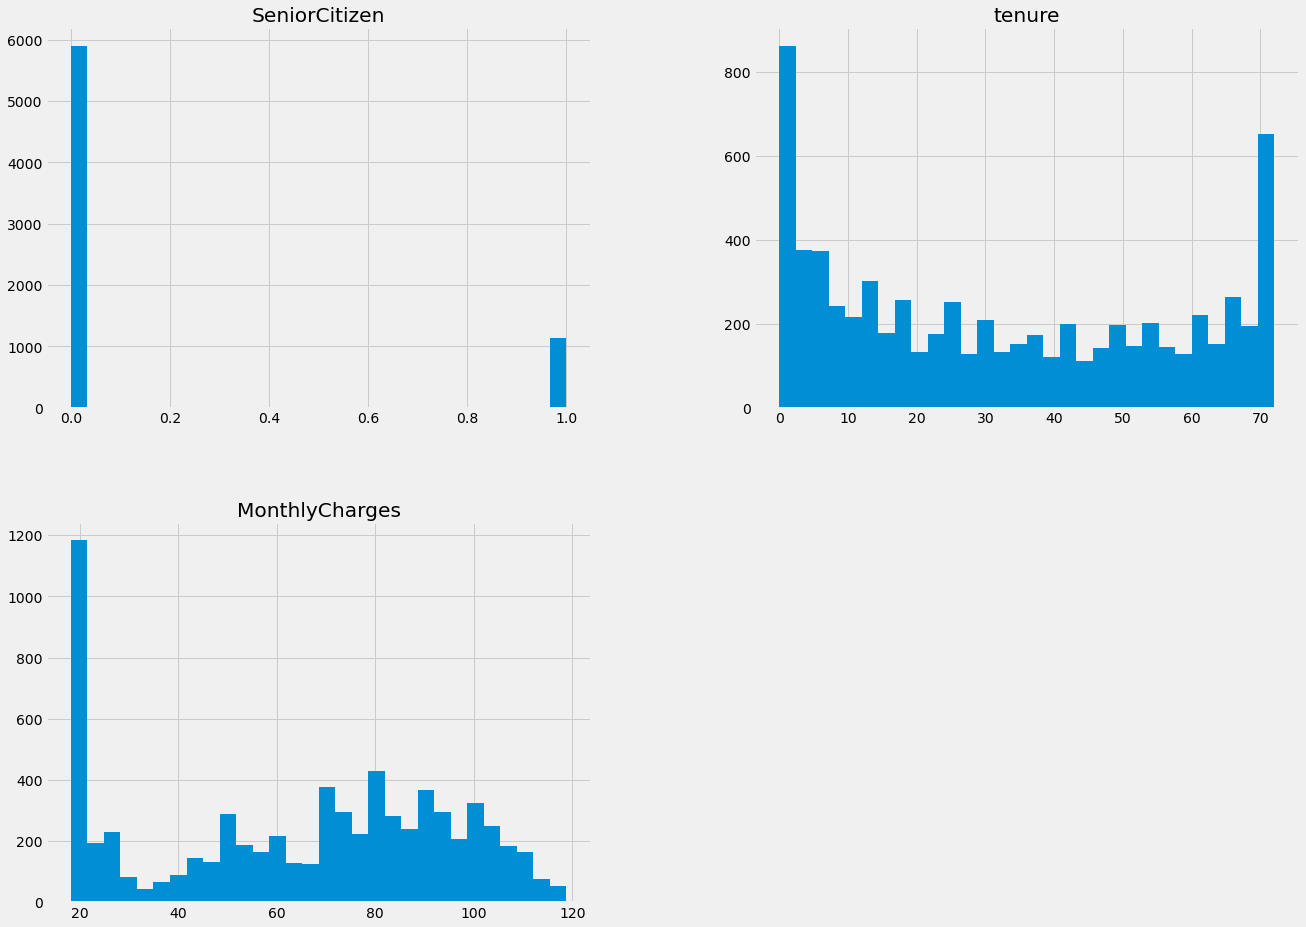

In [9]:
data.hist(bins=30, figsize=(20,15))

plt.show()

Distribusi data numerik 
 - Kolom SeniorCitizen adalah bertipe boolean 0 adalah No dan 1 adalah Yes

 - Tenure terbanyak pada 0 dan 70

 - MonthlyCharges terbanyak yaitu 20

In [10]:
num_churn = data.groupby('Churn').mean()
num_churn

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


Group By kolom numerik untuk divisualisasikan dengan churn

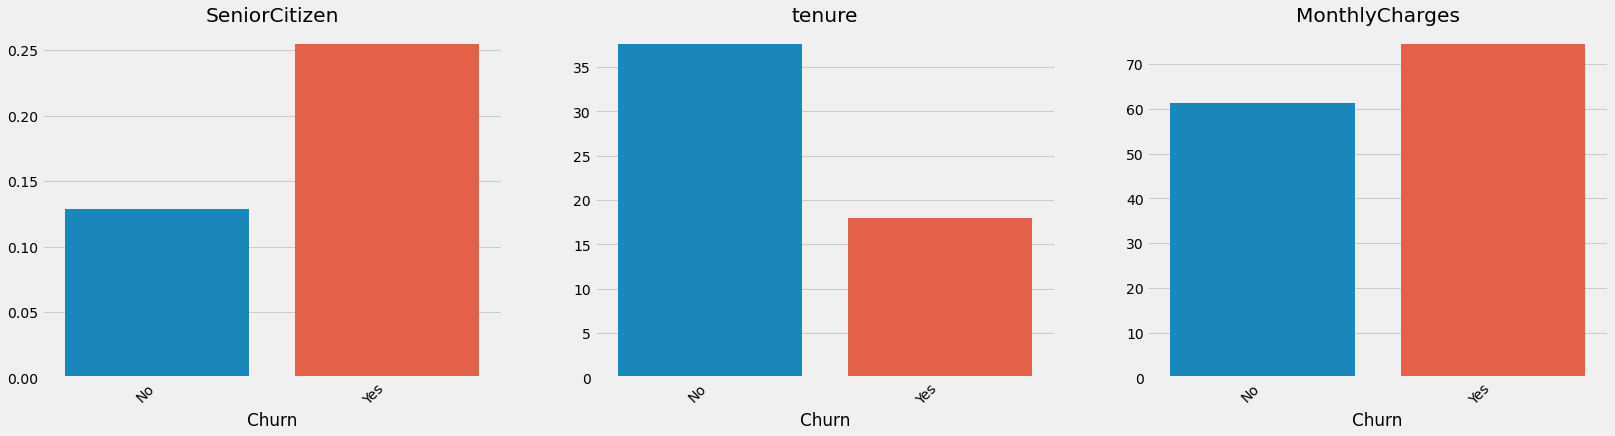

In [11]:
fig,axes=plt.subplots(1,3, figsize=(25,6))
axe= axes.ravel()
for i,col in enumerate(num_churn.columns):
    sns.barplot(x=num_churn[col].index, y=num_churn[col].values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=45, ha='right')
    axe[i].set_title(col)
plt.show()

Perbandingan kolom numerik dengan churn
 - Senior Citizen lebih banyak yang churn dibandingkan tidak
 - Tenur lebih banyak yang tidak churn
 - Monthly Charges lebih banyak yang churn

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

Merubah Total Charges menjadi numerik

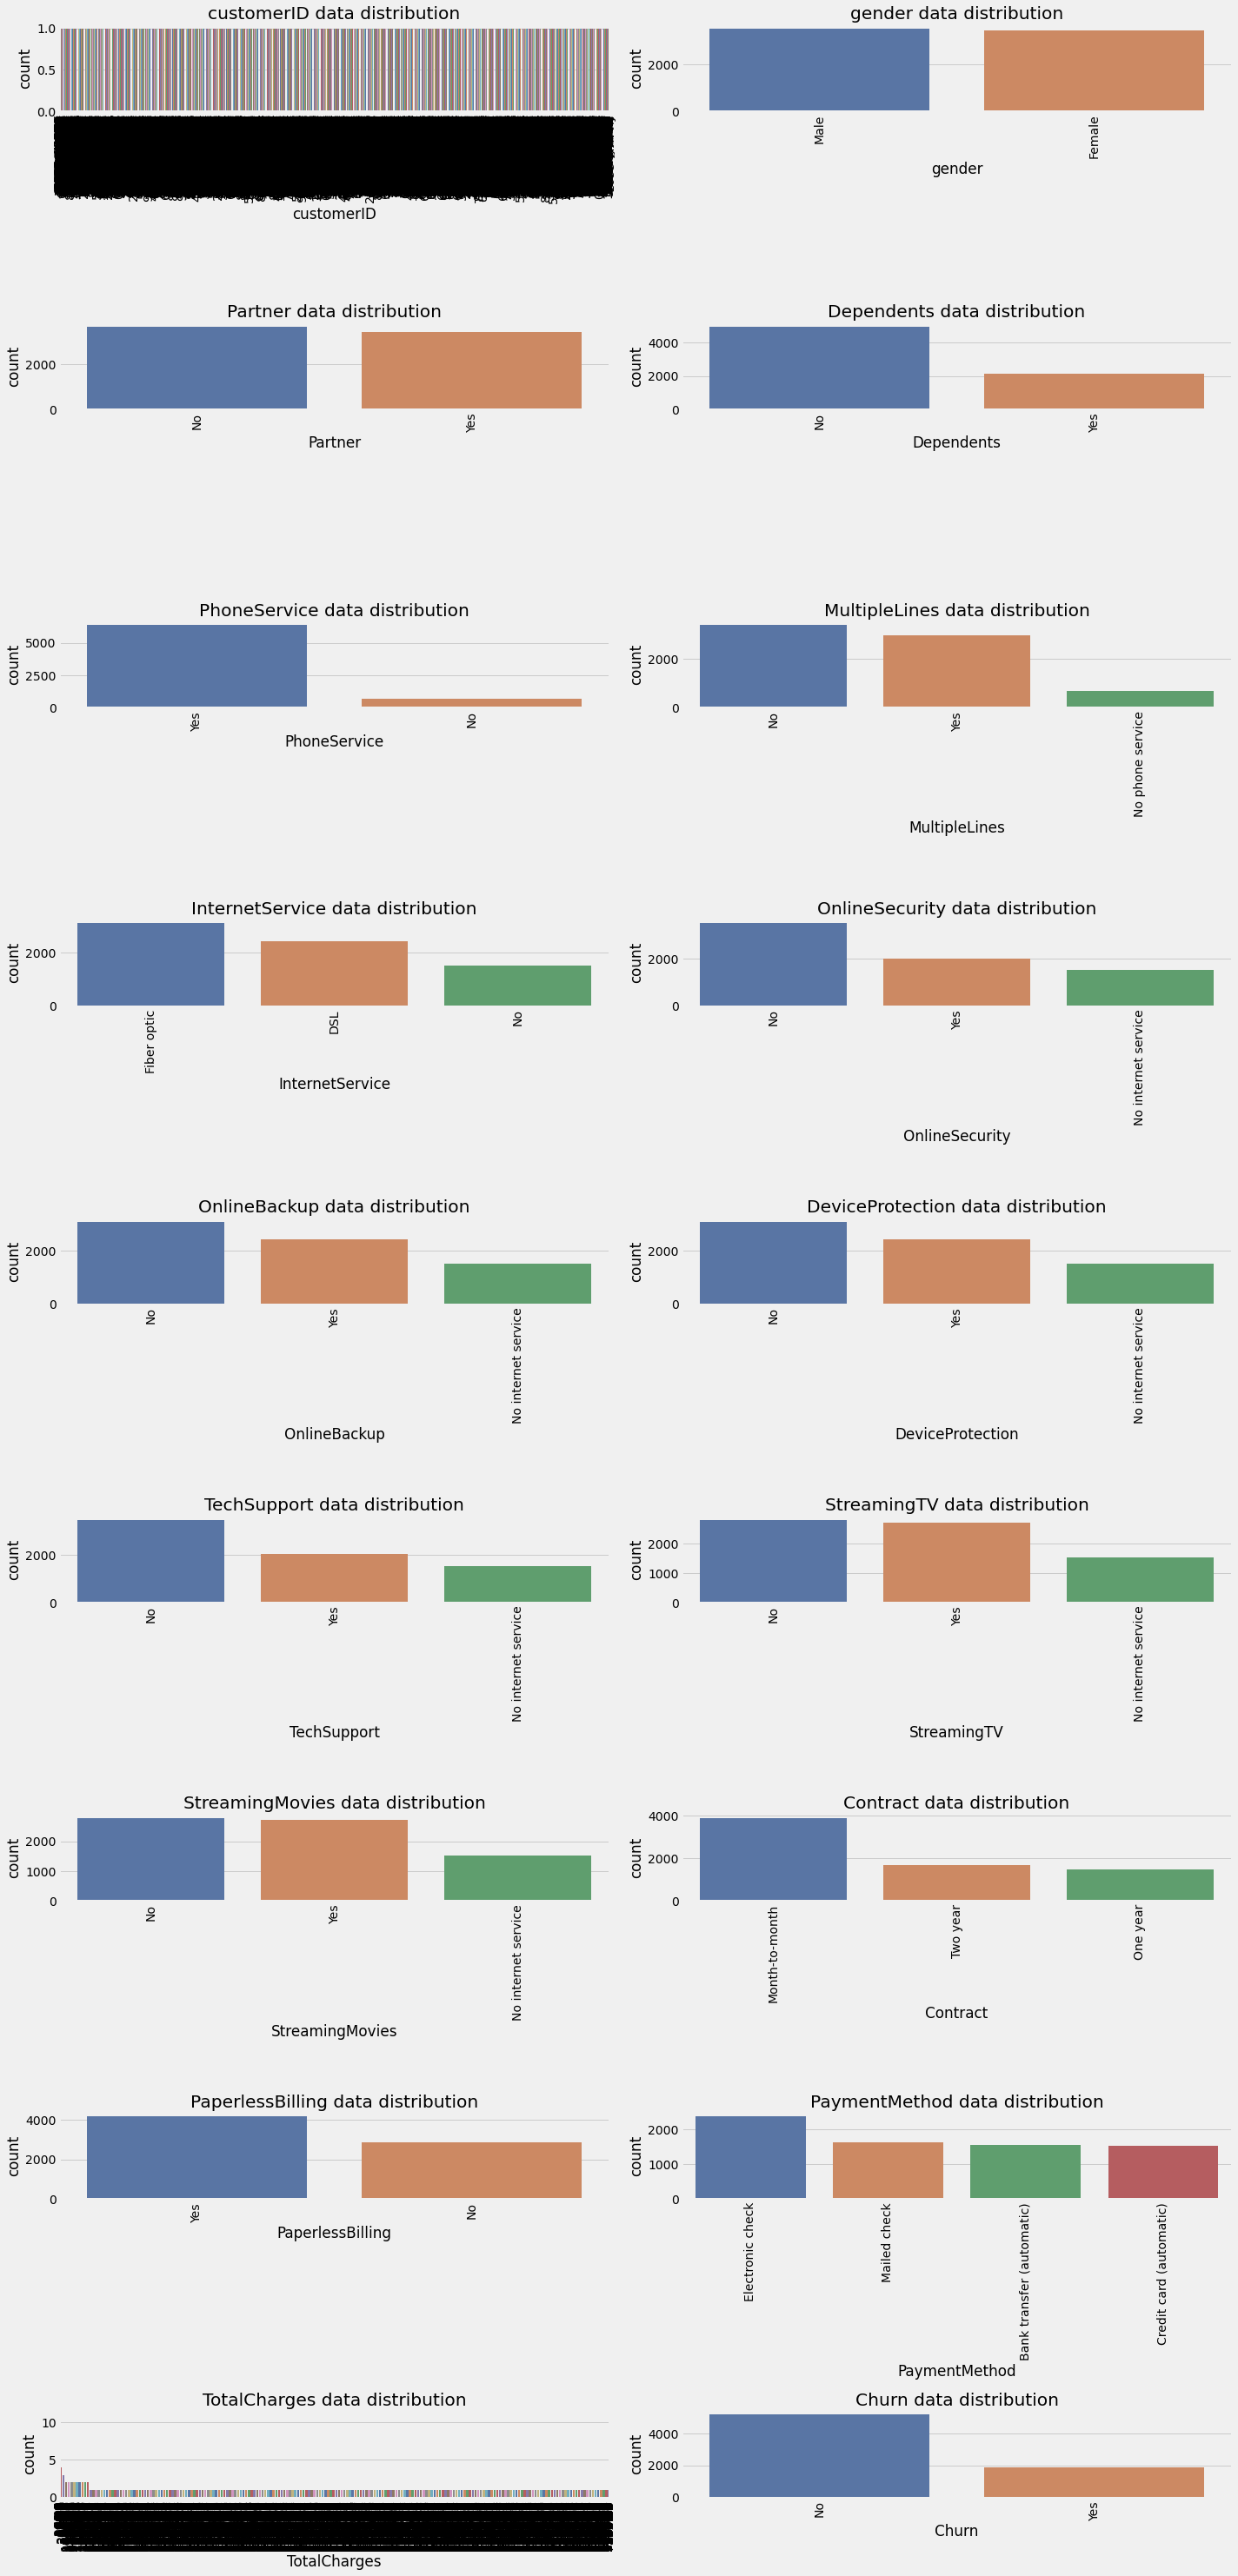

In [13]:
plt.figure(figsize = (20, 45))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = data[cat_column[i]],
        order = data[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "deep"
    )
    plt.title(str(cat_column[i]) + " data distribution", fontweight = 20)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Distribusi data kategorikal, bisa dilihat disini TotalCharges tidak bisa terbaca dikarenakan itu merupakan kolom numerik

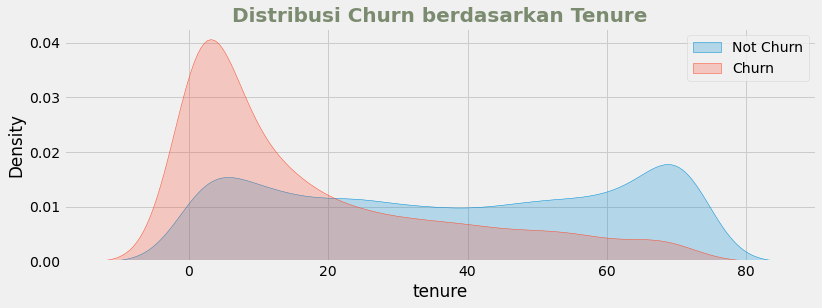

In [14]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'tenure'], label = 'Not Churn', shade = True)
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'tenure'], label = 'Churn', shade = True)
plt.legend()
plt.title('Distribusi Churn berdasarkan Tenure',fontdict={'fontsize':20,'color':'#7b8b6f','fontweight':'bold'})
plt.show()

Pelanggan dengan tenure 0 sampai dengan 20 mayoritas churn, sedangkan 20 sampai 80 lebih banyak yang tidak churn

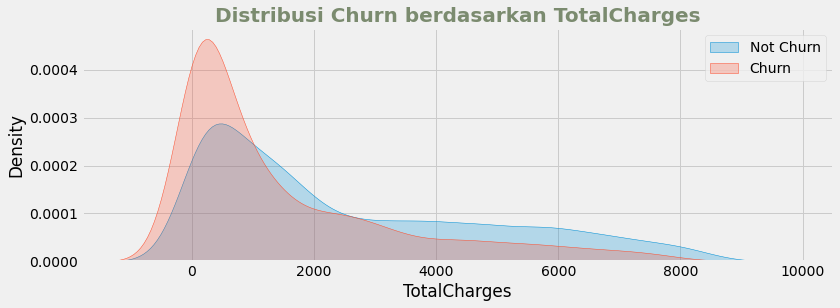

In [15]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'TotalCharges'], label = 'Not Churn', shade = True)
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'TotalCharges'], label = 'Churn', shade = True)
plt.legend()
plt.title('Distribusi Churn berdasarkan TotalCharges',fontdict={'fontsize':20,'color':'#7b8b6f','fontweight':'bold'})
plt.show()

Untuk Total charge rendah dari 0 sampai dengan 1000 mayoritas pelanggan churn, sedangkan pelanggan memiliki Total Charges tinggi mayoritas tidak churn

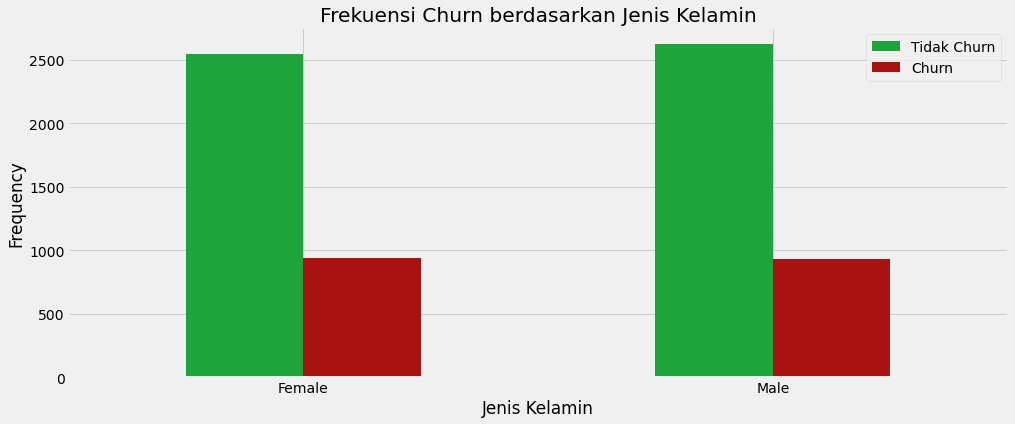

In [16]:
pd.crosstab(data.gender,data.Churn).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi Churn berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.xticks(rotation=0)
plt.legend(["Tidak Churn", "Churn"])
plt.ylabel('Frequency')
plt.show()

Gender tidak memiliki korelasi terhadap churn atau tidaknya dikarenakan untuk pria dan wanita sama saja datanya

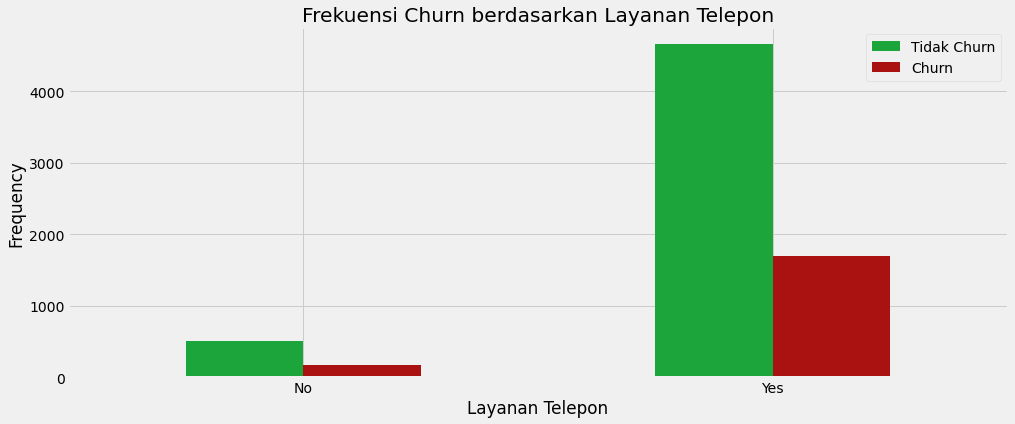

In [17]:
pd.crosstab(data.PhoneService,data.Churn).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi Churn berdasarkan Layanan Telepon')
plt.xlabel('Layanan Telepon')
plt.xticks(rotation=0)
plt.legend(["Tidak Churn", "Churn"])
plt.ylabel('Frequency')
plt.show()

Untuk pelanggan yang memiliki layanan telepon datanya imbalance sehingga tidak bisa dijadikan acuan untuk target

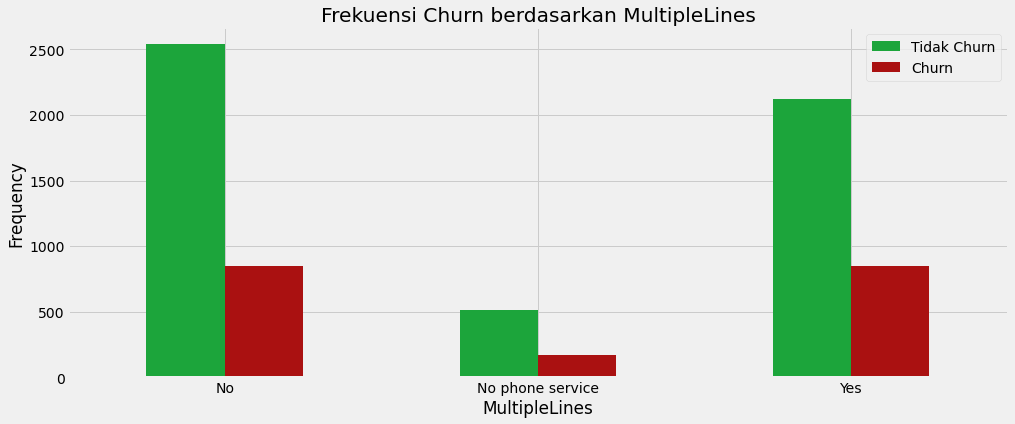

In [18]:
pd.crosstab(data.MultipleLines,data.Churn).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi Churn berdasarkan MultipleLines')
plt.xlabel('MultipleLines')
plt.xticks(rotation=0)
plt.legend(["Tidak Churn", "Churn"])
plt.ylabel('Frequency')
plt.show()

Pelanggan yang memiliki MultipleLines sama-sama banyak yg churn

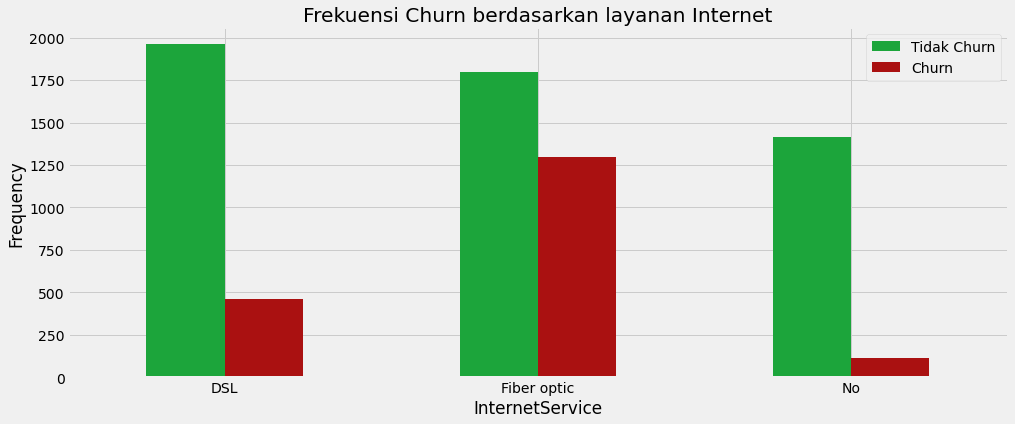

In [19]:
pd.crosstab(data.InternetService,data.Churn).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi Churn berdasarkan layanan Internet')
plt.xlabel('InternetService')
plt.xticks(rotation=0)
plt.legend(["Tidak Churn", "Churn"])
plt.ylabel('Frequency')
plt.show()

Pelanggan yang menggunakan layanan internet Fiber Optic lebih banyak tidak churn  dibandingkan layanan lain

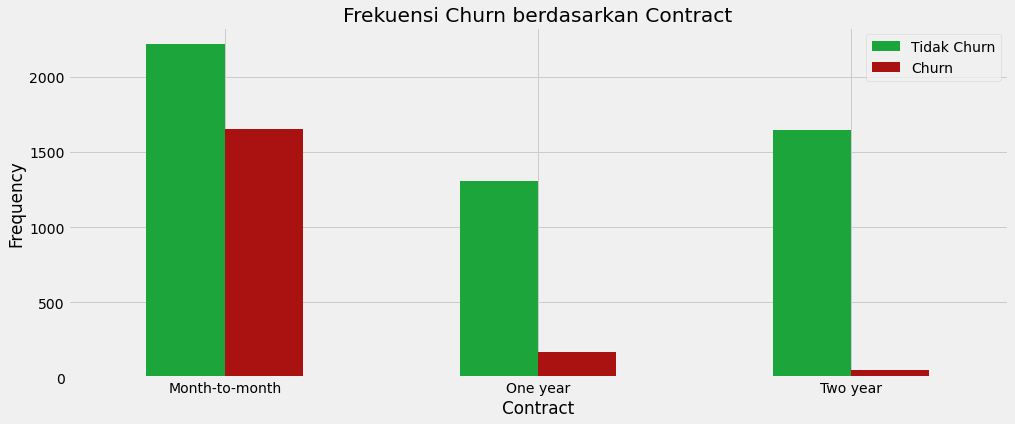

In [20]:
pd.crosstab(data.Contract,data.Churn).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi Churn berdasarkan Contract')
plt.xlabel('Contract')
plt.xticks(rotation=0)
plt.legend(["Tidak Churn", "Churn"])
plt.ylabel('Frequency')
plt.show()

Pelanggan yang dibawah 1 tahun mayoritas churn

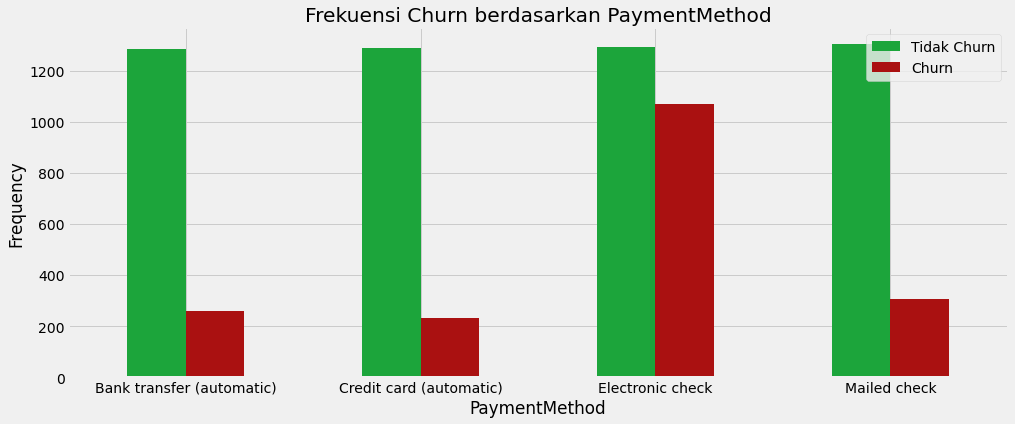

In [21]:
pd.crosstab(data.PaymentMethod,data.Churn).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi Churn berdasarkan PaymentMethod')
plt.xlabel('PaymentMethod')
plt.xticks(rotation=0)
plt.legend(["Tidak Churn", "Churn"])
plt.ylabel('Frequency')
plt.show()

Jenis pembayaran tidak berpengaruh terhadap pelanggan churn atau tidak churn

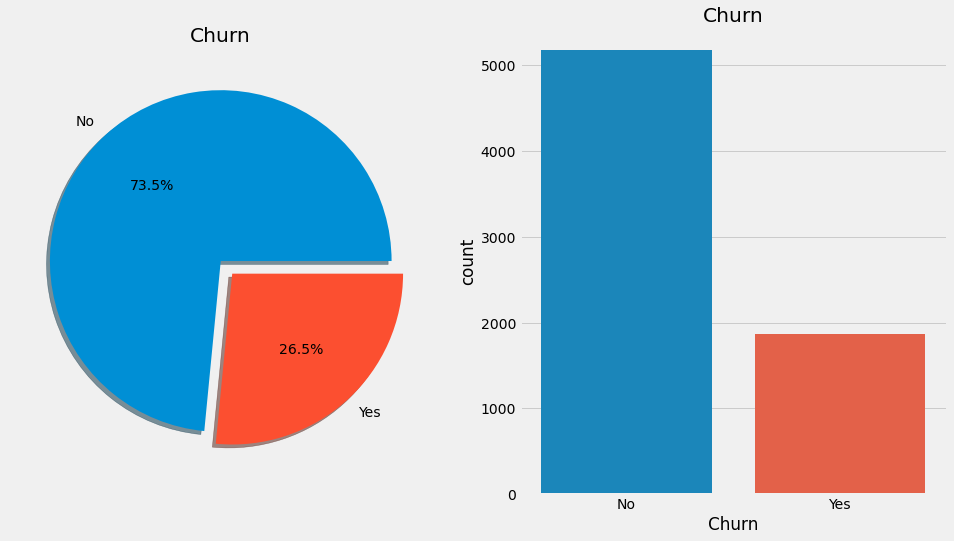

In [22]:
f,ax=plt.subplots(1,2,figsize=(15,8))
data['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn')
ax[0].set_ylabel('')
sns.countplot('Churn',data=data,ax=ax[1])
ax[1].set_title('Churn')
plt.show()

Datanya Imbalance untuk yang churn 26.5% sedangkan tidak churn 73.5%

# Preprocessing

In [23]:
tf.random.set_seed(25)
np.random.seed(25)

Menerapkan Random Seed agar hasilnya saat dijalankan ulang tidak berubah

In [24]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
data['Churn'] = data['Churn'].map({'No':0,
                               'Yes': 1})

Merubah target menjadi angka No menjadi 0 dan Yes menjadi 1, agar bisa dilakukan pengecekan korelasi dengan kolom numerik lainya

In [26]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No',
                               1: 'Yes'})

Kolom SeniorCitizen yang berbentuk 0 dan 1 diubah menjadi kategorikal.

In [27]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Data sesudah dirubah

## Data Inference

In [28]:
data_inf = data.sample(10, random_state=25)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4864,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
5033,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2671,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3919,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
3630,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
6110,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
792,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
5747,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
3593,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
2174,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


Mengambil 10 sample data inference dari dataset

In [29]:
data_train = data.drop(data_inf.index)
data_train.shape

(7033, 21)

Drop data inference dari data train dan sekarang data train menjadi 7033 baris

In [30]:
data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
1,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
4,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
5,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
6,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
7,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
8,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
9,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


Reset index dataset dan data inference

## Splitting Dataset

In [31]:
X = data.drop('Churn', axis=1)
y = data['Churn']

Split data X dan y sebagai target yaitu kolom churn

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=25)
print('X_Train Size :', X_train.shape)
print('X_Test Size :', X_test.shape)
print('y_Train Size :', y_train.shape)
print('y_Test Size :', y_test.shape)
print('X_val Size :', X_val.shape)
print('y_val Size :', y_val.shape)

X_Train Size : (5070, 20)
X_Test Size : (1409, 20)
y_Train Size : (5070,)
y_Test Size : (1409,)
X_val Size : (564, 20)
y_val Size : (564,)


Split dataset menjadi train set 80%, test set 20% dan val set 10%

## Handling Outlier

In [33]:
def diagnostic_plots(X_train, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column],bins=30, palette='deep')
    plt.title(f'Distribution of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(X_train[column])
    plt.title(f'Boxplot of {column}')

    skewness = X_train[column].skew(axis = 0, skipna = True)
    print (f'Skewness of {column} =', skewness)

Membuat fungsi visualisasi distribusi data, boxplot dan cek skew data

In [34]:
num_columns = X_train.select_dtypes (include=np.number).columns.tolist()

Membuat variable num_columns

Skewness of tenure = 0.22202829092806206
Skewness of MonthlyCharges = -0.21734837889012318
Skewness of TotalCharges = 0.9459776168319727


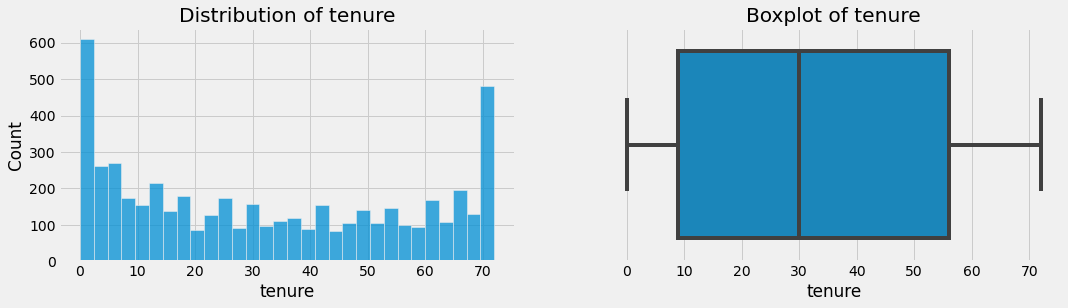

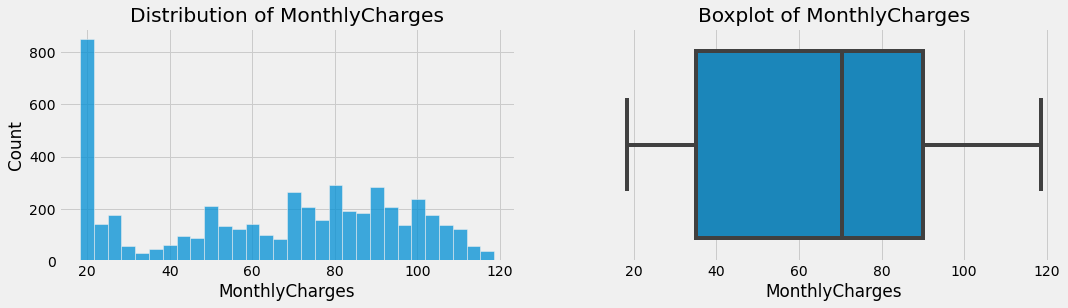

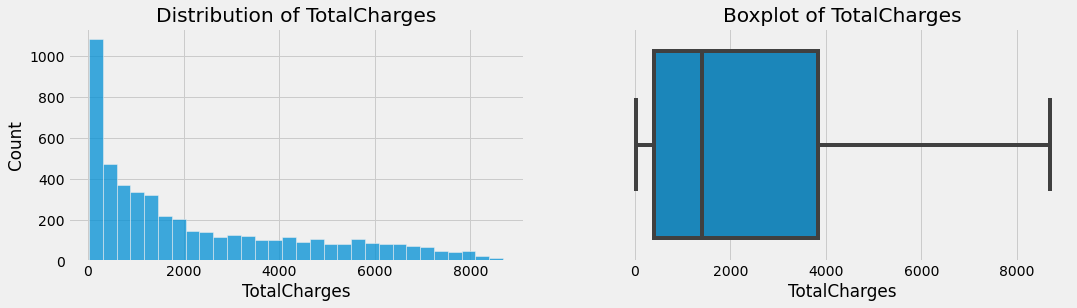

In [35]:
for column in num_columns:
    diagnostic_plots (X_train, column)

Diatas adalah hasil visualisasi histogram, boxplot dan nilai skewnes

In [36]:
def check_outliers(X_train, column):
    skewness = X_train[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = X_train[column].mean() + 3 * X_train[column].std()
        lower_boundary = X_train[column].mean() - 3 * X_train[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(X_train[X_train[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(X_train[X_train[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(X_train[X_train[column] > upper_boundary])  / len(X_train)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(X_train[X_train[column] < lower_boundary])  / len(X_train)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = X_train[column].quantile(0.75) - X_train[column].quantile(0.25)
         lower_boundary = X_train[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = X_train[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(X_train[X_train[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(X_train[X_train[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(X_train[X_train[column] > upper_boundary])  / len(X_train)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(X_train[X_train[column] < lower_boundary])  / len(X_train)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

Membuat fungis cek outlier

In [37]:
outlier_feature = ['tenure', 'MonthlyCharges', 'TotalCharges']

Masukan fitur yang akan di cek outlier

In [38]:
for feature in outlier_feature:
    check_outliers(X_train,feature)

['Normal']
Upper Boundary of tenure: 106.35632237412028
Lower Boundary of tenure: -41.04507977056999
Total Data Above Upper Boundary tenure: 0
Total Data Below Lower Boundary tenure: 0
% Data Above Upper Boundary tenure: 0.0
% Data Below Lower Boundary tenure: 0.0
----------------------------------------------------------------------------------------------------
['Normal']
Upper Boundary of MonthlyCharges: 155.54786403125962
Lower Boundary of MonthlyCharges: -25.930388686092087
Total Data Above Upper Boundary MonthlyCharges: 0
Total Data Below Lower Boundary MonthlyCharges: 0
% Data Above Upper Boundary MonthlyCharges: 0.0
% Data Below Lower Boundary MonthlyCharges: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of TotalCharges: 8968.09375
Lower Boundary of TotalCharges: -4722.65625
Total Data Above Upper Boundary TotalCharges: 0
Total Data Below Lower Boundary TotalCharges: 0
% Data Above Upper Bounda

Tidak terdapat Outlier pada dataset

## Handling Missing Values

### X_train

In [39]:
X_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
dtype: int64

Terdapat 6 missing value pada TotalCharges

In [40]:
print(X_train['TotalCharges'].median())

1412.525


Karena Total Charges berdistribusi skew, maka untuk missing value di impute menggunakan median 1412.525

In [41]:
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)

Melakukan imput Total Charges menggunakan median

In [42]:
X_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Sudah tidak terdapat missing value pada X_train

### X_test

In [43]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

Terdapat 2 missing value pada TotalCharges

In [44]:
X_test['TotalCharges'].fillna(1412.525, inplace=True)

Imput missing value pada Total Charges pada X_test menggunakan median dari X_train

In [45]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Sudah tidak terdapat missing value pada X_test

### X_val

In [46]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

Terdapat 3 missing value pada X_val

In [47]:
X_val['TotalCharges'].fillna(1412.525, inplace=True)

Imput missing value pada Total Charges pada X_val menggunakan median dari X_train

In [48]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Sudah tidak terdapat Missing value pada X_val

### Data Inference

In [49]:
data_inf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak terdapat missing value pada Data inference

## Fitur Selection

In [50]:
X_train.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_test.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'] ,axis=1, inplace=True)
X_val.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)

Drop Kolom berdasarkan hasil EDA, untuk kolom numerik tidak ada yang saya drop karena menurut saya semua kolom numerik yaitu tenor, tagihan bulanan dan tagihan total berfungi untuk modeling, karena tagihan pelanggan cukup berpengaruh terhadap pelanggan churn atau tidak.

In [51]:
X_train.head()

,SeniorCitizen,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges
6487,No,Yes,61,Yes,Fiber optic,No,Yes,No,Yes,Two year,94.35,5703.00
5775,No,Yes,58,Yes,Fiber optic,No,No,No,No,Two year,82.50,4828.05
5654,Yes,Yes,70,No,Fiber optic,Yes,Yes,Yes,No,Two year,105.35,7511.90
4867,No,Yes,34,Yes,Fiber optic,No,No,Yes,No,Month-to-month,100.85,3527.30
2156,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,80.55,184.10


Fitur terbaru dari X_train

In [52]:
X_test.head()

,SeniorCitizen,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges
2028,No,No,15,No,No,No internet service,No internet service,No internet service,No internet service,Two year,19.60,331.60
3469,Yes,No,15,No,Fiber optic,No,No,No,No,Month-to-month,91.50,1400.30
1922,No,Yes,25,Yes,DSL,No,No,No,No,Month-to-month,60.35,1404.65
3900,No,Yes,35,No,No,No internet service,No internet service,No internet service,No internet service,One year,19.65,708.80
2468,No,Yes,4,No phone service,DSL,No,Yes,No,No,Month-to-month,48.55,201.00


Fitur terbaru X_test

In [53]:
X_val.head()

,SeniorCitizen,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges
518,Yes,Yes,27,No,Fiber optic,Yes,No,No,No,Month-to-month,75.20,1929.35
3134,No,Yes,36,No,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,19.20,702.90
4786,No,No,72,Yes,Fiber optic,No,Yes,Yes,No,Two year,103.65,7634.80
20,Yes,No,1,No phone service,DSL,No,No,Yes,No,Month-to-month,39.65,39.65
3869,No,Yes,50,Yes,Fiber optic,No,Yes,No,No,One year,98.25,4858.70


Fitur terbaru X_val

## Split antara fitur numerik dan kategorical

In [54]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']


Membagi data numerik dan kategorikal

## Save Preprocessing

In [55]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['SeniorCitizen', 'Partner', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

- Scaling menggunakan Standard Scaller dikarenakan kolom numerik berdistribusi normal
- Encoding menggunakan One Hot Encoder dikarenakan merupakan tipe data nominal

In [56]:
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

Fit model X_train, untuk X_val dan X_test hanya di transform

In [57]:
with open("preprocessings.pkl", "wb") as f:
    pickle.dump(data_pipeline, f)

Save model Preprocessing

# Model Definition, Training dan Evaluation

## Sequential API 

In [58]:
model_seq = Sequential()
model_seq.add(Dense(16, activation='relu',  input_shape=(28,)))
model_seq.add(Dropout(0.20))
model_seq.add(Dense(8, activation="relu"))
model_seq.add(Dropout(0.20))
model_seq.add(Dense(1, activation='sigmoid')) 

Disini saya menggunakan model = Sequential, 2 hidden layer dengan Dense 16 dan 8, sedangkan activationnya relu

In [59]:
model_seq.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Model compilenya menggunakan loss : binary_crossentropy, optimizer : sgd, metrics : accuracy

In [60]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                464       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


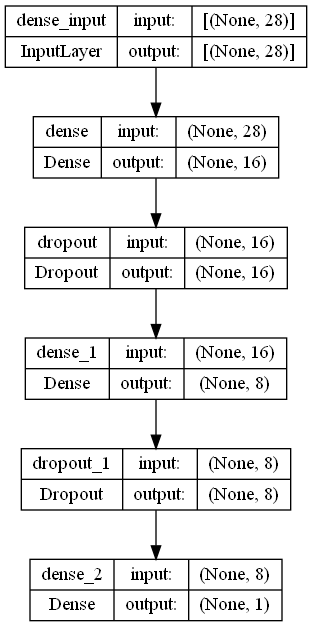

In [61]:
tf.keras.utils.plot_model(model_seq, show_shapes=True)

In [62]:
history_seq = model_seq.fit(X_train, y_train, epochs=40, validation_data=(X_val,y_val))

Epoch 1/40
159/159 [==============================] - 1s 3ms/step - loss: 0.6143 - accuracy: 0.7229 - val_loss: 0.5767 - val_accuracy: 0.7181
Epoch 2/40
159/159 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7365 - val_loss: 0.5292 - val_accuracy: 0.7181
Epoch 3/40
159/159 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7365 - val_loss: 0.5029 - val_accuracy: 0.7181
Epoch 4/40
159/159 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7365 - val_loss: 0.4851 - val_accuracy: 0.7181
Epoch 5/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7365 - val_loss: 0.4725 - val_accuracy: 0.7181
Epoch 6/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7365 - val_loss: 0.4651 - val_accuracy: 0.7181
Epoch 7/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7365 - val_loss: 0.4584 - val_accuracy: 0.7181
Epoch 

Train model dengan 40 epoch

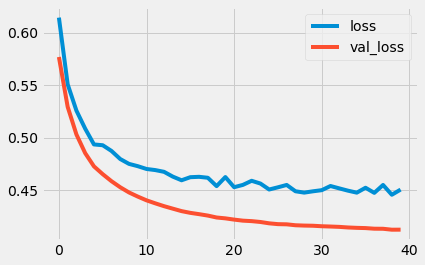

In [63]:
metrics_seq = pd.DataFrame(history_seq.history)
metrics_seq[['loss', 'val_loss']].plot();

Grafik loss dan val_los nya bisa dikatakan goodfit karena memiliki gap yang terbilang tidak terlalu jauh, tetapi nilai loss nya pada epoch 20 sampai 40 sudah tidak terdapat pergerakan yang signifikan

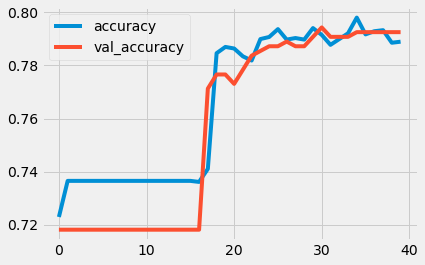

In [64]:
metrics_seq[['accuracy', 'val_accuracy']].plot();

Nilai akurasi antara train dan valnya berdekatan dan bisa dikatakan goodfit

In [65]:
y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq < 0.5, 0, 1).squeeze()

45/45 [==============================] - 0s 930us/step


Predict model Sequential API 

True Positive, True Negarive, False Positive, dan False Negative dari sudut pandang kelas satu:

- True Positive : Pelanggan memang chrun produk telco dan model prediksi pelanggan akan churn produk telco.

- True Negative : Pelanggan tidak akan churn dan model prediksi pelanggan tidak akan churn.

- False Positive : Pelanggan tidak akan churn dan model prediksi pelanggan akan churn.

- False Negative : Pelanggan akan churn, model prediksi pelanggan tidak akan churn.

Dari 4 hal tersebut yang paling berbahaya adalah False positive, karena dapat meninggalkan pelanggan, maka nilai precision yang akan digunakan.


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.48      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Model Sequential memprediksi hasil precision nya didapatkan 65% dari sudut pandang kelas 1.

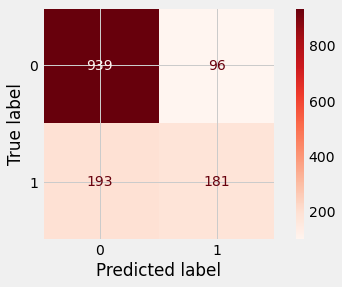

In [67]:
cm = confusion_matrix(y_test,y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Reds')
plt.show()

Berdasarkan confusion Matrix model base Sequential API model salah memprediksi 96 False Positif 

## Functional API

In [68]:
data_input = Input(shape=(28,))
hidden_1 = Dense(32, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.20)(hidden_1)
hidden_2 = Dense(16, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.20)(hidden_2)
hidden_3 = Dense(8, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.20)(hidden_3)
output = Dense(1, activation='sigmoid')(hidden_drop_3)

model_func = Model(inputs=data_input, outputs=output)

Disini saya menggunakan 3 hidden layer dengan Dense hidden layer pertama = 32, hidden layer ke2 = 16, hidden layer 3 = 8. Untuk activation semua hidden layer = relu.

In [69]:
model_func.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

Model compilenya menggunakan loss : binary_crossentropy, optimizer : adam dan metrics nya accuracy

In [70]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                928       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0     

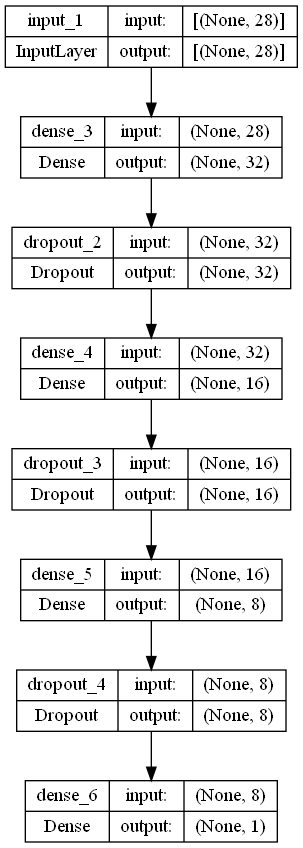

In [71]:
tf.keras.utils.plot_model(model_func, show_shapes=True)

In [72]:
history_func = model_func.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
159/159 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.7304 - val_loss: 0.4396 - val_accuracy: 0.7163
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7576 - val_loss: 0.4218 - val_accuracy: 0.7819
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7740 - val_loss: 0.4163 - val_accuracy: 0.7872
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7805 - val_loss: 0.4123 - val_accuracy: 0.7961
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7836 - val_loss: 0.4048 - val_accuracy: 0.7819
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7878 - val_loss: 0.4051 - val_accuracy: 0.7855
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7996 - val_loss: 0.4000 - val_accuracy: 0.7890

Train model dengan 100 epoch

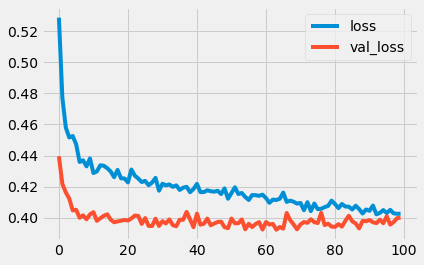

In [73]:
metrics_func = pd.DataFrame(history_func.history)
metrics_func[['loss', 'val_loss']].plot();

Grafik loss dan val_los nya bisa dikatakan goodfit karena memiliki gap yang terbilang sangat kecil sama-sama pada angka 0.40 saja, tetapi nilai loss nya pada epoch 20 sampai 80 sudah tidak terdapat pergerakan yang signifikan

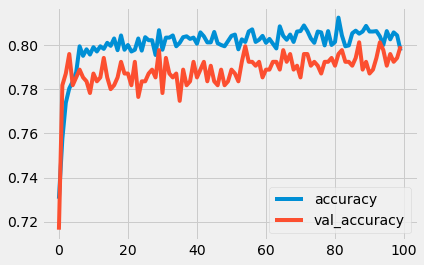

In [74]:
metrics_func[['accuracy', 'val_accuracy']].plot();

Nilai akurasi antara train dan valnya berdekatan diangka 80 dan bisa dikatakan goodfit.

In [75]:
y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func < 0.5, 0, 1).squeeze()

45/45 [==============================] - 0s 689us/step


Predict model Functional API

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.62      0.58      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



Model memprediksi hasil precision nya didapatan 62%.

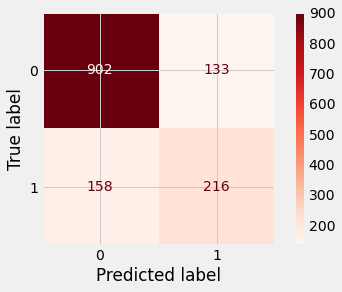

In [77]:
cm = confusion_matrix(y_test,y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Reds')
plt.show()

Model Functional API salah memprediksi False Positive sebanyak 133, lebih banyak salah prediksi dibandingkan model Sequential API

# Model Improvements

## Sequential API 

In [78]:
model_seq_imp = Sequential()
model_seq_imp.add(Dense(64,input_shape=(28,),kernel_initializer=tf.keras.initializers.he_normal(seed=40), activation='relu'))
model_seq_imp.add(Dropout(rate=0.1))

model_seq_imp.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2()))
model_seq_imp.add(Dropout(rate=0.20))

model_seq_imp.add(Dense(16, activation='relu' , kernel_regularizer=tf.keras.regularizers.l2()))
model_seq_imp.add(Dropout(rate=0.20))

model_seq_imp.add(Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2()))
model_seq_imp.add(Dropout(rate=0.20))

model_seq_imp.add(Dense(1, activation='sigmoid'))

Pada model improvements Sequential API disini saya menambahkan 1 layer menjadi 4 layer, menambahkan initializers : He Uniform dan memberi activation = relu, dan menambah reqularizer

In [79]:
class stop_training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy')>0.80):
            print("\nMencapai 80% accuracy stop training")
            self.model.stop_training = True

my_callbacks = stop_training()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4,
                                                  restore_best_weights=True)
model_seq_imp.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

Disini saya menambah callback early stoping dan pada model compile mengubah optimizer menjadi adam

In [80]:
model_seq_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1856      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                

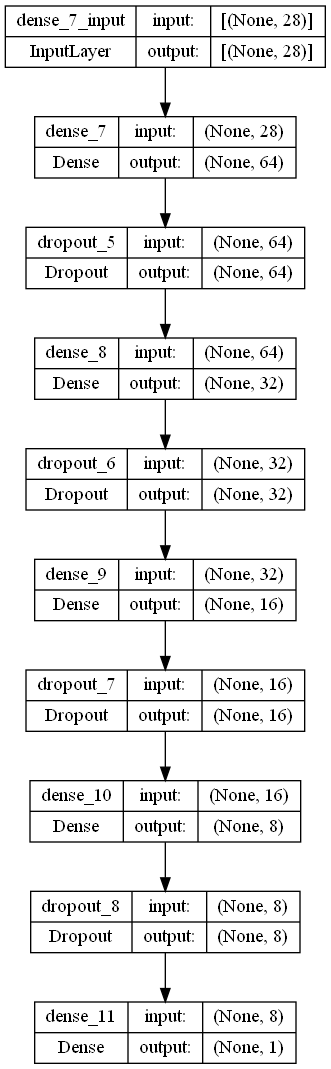

In [81]:
tf.keras.utils.plot_model(model_seq_imp, show_shapes=True)

In [82]:
history_seq_imp = model_seq_imp.fit(X_train, y_train, epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
159/159 [==============================] - 1s 2ms/step - loss: 1.0494 - accuracy: 0.7339 - val_loss: 0.7611 - val_accuracy: 0.7837
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.7708 - val_loss: 0.5763 - val_accuracy: 0.7837
Epoch 3/100
159/159 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.7838 - val_loss: 0.5034 - val_accuracy: 0.8014
Epoch 4/100
159/159 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.7807 - val_loss: 0.4733 - val_accuracy: 0.7979
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7797 - val_loss: 0.4549 - val_accuracy: 0.7926
Epoch 6/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7809 - val_loss: 0.4487 - val_accuracy: 0.7908
Epoch 7/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7959 - val_loss: 0.4417 - val_accuracy: 0.7908

Merubah train model menjadi 100 pada base model 40 epoch

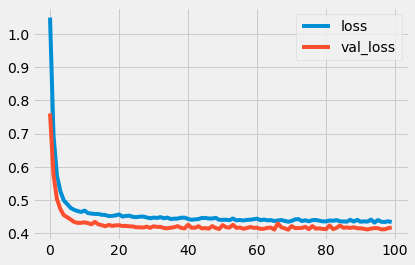

In [83]:
metrics_seq_imp = pd.DataFrame(history_seq_imp.history)
metrics_seq_imp[['loss', 'val_loss']].plot();

Grafik loss dan val_loss pada pada model improvements menjadi goodfit dengan gap yang sangat kecil, lebih baik dibandingkan dengan base model Sequential API

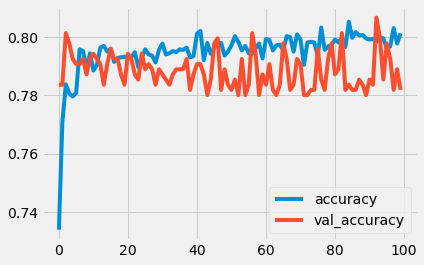

In [84]:
metrics_seq_imp[['accuracy', 'val_accuracy']].plot();

Tetapi pada accuracy dan val accuracy model improvements Sequential terjadi peningkatan gap dari base model.

In [85]:
y_pred_seq_imp = model_seq_imp.predict(X_test)
y_pred_seq_imp = np.where(y_pred_seq_imp < 0.5, 0, 1).squeeze()

45/45 [==============================] - 0s 838us/step


Prediksi model improvements Sequential API

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_seq_imp))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Model improvements Sequential memprediksi hasil precisionnya didapatkan 65%, tapi ada peningkatan nilai akurasi dari 79% menjadi 80%.

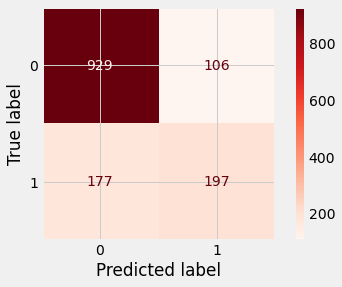

In [87]:
cm = confusion_matrix(y_test,y_pred_seq_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Reds')
plt.show()

Model Improvements Sequential API lebih banyak salah prediksi False Positive sebanyak 106 salah prediksi.

## Functional API

In [88]:
data_input = Input(shape=(28,))
hidden_1 = Dense(32, activation='relu', kernel_initializer='he_normal', use_bias=False)(data_input)
hidden_drop_1 = Dropout(0.20)(hidden_1)
hidden_2 = Dense(16, activation='relu', kernel_initializer='he_normal', use_bias=False)(hidden_drop_1)
hidden_drop_2 = Dropout(0.20)(hidden_2)
hidden_3 = Dense(8, activation='relu', kernel_initializer='he_normal', use_bias=False)(hidden_drop_2)
hidden_drop_3 = Dropout(0.20)(hidden_3)
hidden_4 = Dense(4, activation='relu', kernel_initializer='he_normal', use_bias=False)(hidden_drop_3)
hidden_drop_4 = Dropout(0.20)(hidden_4)
output = Dense(1, activation='sigmoid')(hidden_drop_4)

model_func_imp = Model(inputs=data_input, outputs=output)

Pada model improvements Functional API disini sama seperti Sequential, menambahkan initializers : He Uniform dan memberi activation = relu, dan menambah reqularizer

In [89]:
class stop_training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy')>0.80):
            print("\nMencapai 80% accuracy stop training")
            self.model.stop_training = True

my_callbacks = stop_training()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4,
                                                  restore_best_weights=True)

model_func_imp.compile(loss='binary_crossentropy',
              optimizer= 'AdaMax',
              metrics=['accuracy'])

Disini saya menambah callback early stoping dan pada model compile mengubah optimizer menjadi AdaMax

In [90]:
model_func_imp.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_12 (Dense)            (None, 32)                896       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                512       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 128       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0   

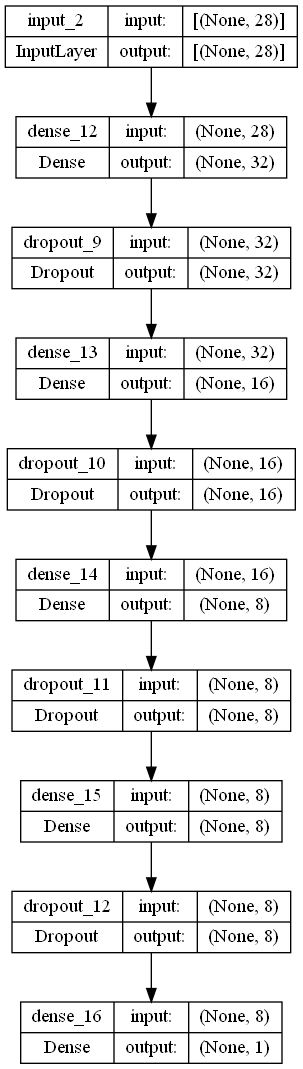

In [91]:
tf.keras.utils.plot_model(model_func_imp, show_shapes=True)

In [92]:
history_func_imp = model_func_imp.fit(X_train, y_train, epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
159/159 [==============================] - 1s 2ms/step - loss: 0.6550 - accuracy: 0.5828 - val_loss: 0.4954 - val_accuracy: 0.7695
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.6803 - val_loss: 0.4597 - val_accuracy: 0.7376
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7136 - val_loss: 0.4484 - val_accuracy: 0.7234
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7227 - val_loss: 0.4391 - val_accuracy: 0.7216
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7404 - val_loss: 0.4340 - val_accuracy: 0.7234
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7517 - val_loss: 0.4308 - val_accuracy: 0.7199
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7550 - val_loss: 0.4279 - val_accuracy: 0.7216

Training model menggunakan 100 epoch

(0.35, 0.7)

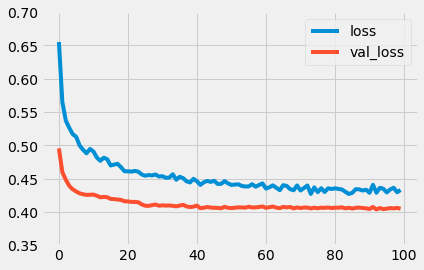

In [103]:
metrics_func_imp = pd.DataFrame(history_func_imp.history)
metrics_func_imp[['loss', 'val_loss']].plot();
plt.ylim(0.35, 0.7)

Grafik loss dan Val_loss nya bisa dikatakan goodfit karena hanya memiliki gap tidak sampai 0.5, tapi pada epoch 20 sampai 100 tidak terjadi banyak pergerakan yang signifikan.

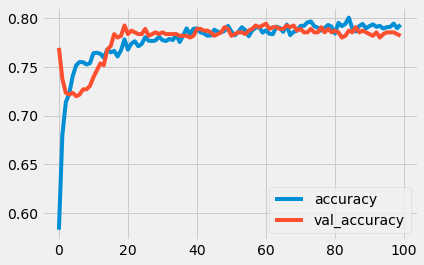

In [94]:
metrics_func_imp[['accuracy', 'val_accuracy']].plot();

Untuk nilai akurasi train dan val_akurasi nya goodfit terlihat grafiknya saling berdekatan.

In [95]:
y_pred_func_imp = model_func_imp.predict(X_test)
y_pred_func_imp = np.where(y_pred_func_imp < 0.5, 0, 1).squeeze()

45/45 [==============================] - 0s 998us/step


Prediksi model improvements functional API.

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_func_imp))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.68      0.43      0.52       374

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



Model Improvements Functional berhasil meningkatkan nilai precision dari 62% menjadi 68%

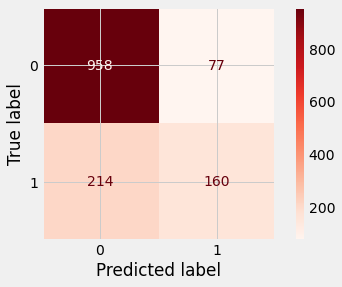

In [97]:
cm = confusion_matrix(y_test,y_pred_func_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Reds')
plt.show()

Terjadi penurunan salah prediksi False Positive dari model improvements Functional yang awalnya 133 menjadi 77. maka bisa dikatakan model improvements Functional API ini adalah model terbaik dari 4 model yang telah dibuat.

# Pipeline Tensorflow

In [105]:
#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(64)


#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)


#Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)



#Call Model
data_input = Input(shape=(28,))
hidden_1 = Dense(32, activation='relu', kernel_initializer='he_normal', use_bias=False)(data_input)
hidden_drop_1 = Dropout(0.20)(hidden_1)
hidden_2 = Dense(16, activation='relu', kernel_initializer='he_normal', use_bias=False)(hidden_drop_1)
hidden_drop_2 = Dropout(0.20)(hidden_2)
hidden_3 = Dense(8, activation='relu', kernel_initializer='he_normal', use_bias=False)(hidden_drop_2)
hidden_drop_3 = Dropout(0.20)(hidden_3)
hidden_4 = Dense(4, activation='relu', kernel_initializer='he_normal', use_bias=False)(hidden_drop_3)
hidden_drop_4 = Dropout(0.20)(hidden_4)
output = Dense(1, activation='sigmoid')(hidden_drop_4)


model_pipeline = Model(inputs=data_input, outputs=output)

#Compile
class stop_training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy')>0.80):
            print("\nMencapai 80% accuracy stop training")
            self.model.stop_training = True

my_callbacks = stop_training()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4,
                                                  restore_best_weights=True)

model_pipeline.compile(loss='binary_crossentropy',
              optimizer= 'AdaMax',
              metrics=['accuracy'])

#Fit
history_pipeline = model_pipeline.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
80/80 [==============================] - 1s 3ms/step - loss: 0.6256 - accuracy: 0.7108 - val_loss: 0.5236 - val_accuracy: 0.7181
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7211 - val_loss: 0.4894 - val_accuracy: 0.7199
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7329 - val_loss: 0.4707 - val_accuracy: 0.7234
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.7316 - val_loss: 0.4594 - val_accuracy: 0.7376
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7321 - val_loss: 0.4499 - val_accuracy: 0.7287
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7377 - val_loss: 0.4430 - val_accuracy: 0.7340
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7391 - val_loss: 0.4420 - val_accuracy: 0.7287
Epoch 8/100
8

Pipeline Tensorflow disini saya menggunakan best model yaitu Functional API yang sudah di improvements yaitu :
- Menggunakan 4 Hidden Layer, pertama Dense 32, kedua Dense 16, ketiga Dense 8, keempat Dense 8
- Activation : relu
- Kernel Initializer : he_normal
- use_bias = False
- Droput 20%

In [106]:
model_pipeline.save('Model.h5')

Save Model h5

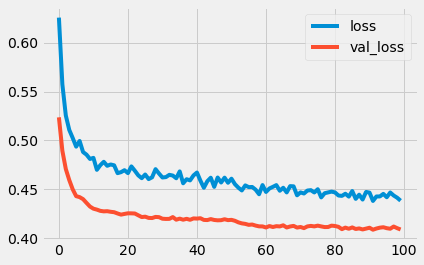

In [107]:
metrics_pipeline = pd.DataFrame(history_pipeline.history)
metrics_pipeline[['loss', 'val_loss']].plot();

Loss dan val_los memiliki gap yg kecil yaitu 0.4% saja maka bisa dikatakan goodfit

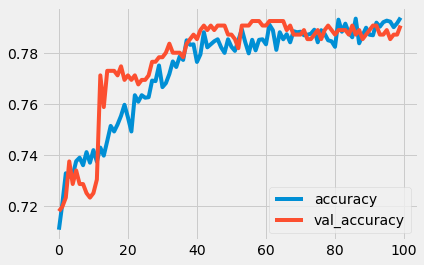

In [108]:
metrics_pipeline[['accuracy', 'val_accuracy']].plot();

akurasi dan val_akurasi memiliki gap yang kecil maka bisa dikatakan goodfit

In [109]:
y_pred_pipeline = model_pipeline.predict(test_dataset)
y_pred_pipeline = np.where(y_pred_pipeline < 0.5, 0, 1).squeeze()

23/23 [==============================] - 0s 1ms/step


Predict model pipeline

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pipeline))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Classification report dari model pipeline yaitu 65% precision

# Model Inference

In [111]:
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
1,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
4,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
5,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
6,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
7,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
8,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
9,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


In [112]:
data_inf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing value karena sudah di handle waktu preprocessing

## Preprocessing

In [113]:
data_infs = data_pipeline.transform(data_inf)

Proses Preprocessing menggunakan pipeline yang sudah dibuat diatas

## Modeling

In [120]:
model_inf=load_model('Model.h5')
model_inf.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_22 (Dense)            (None, 32)                896       
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                512       
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                 128       
                                                                 
 dropout_19 (Dropout)        (None, 8)                 0   

Modeling menggunakan hasil modeling pipeline

## Prediksi

In [129]:
y_pred_inf = model_inf.predict(data_infs)
y_pred_inf = np.where(y_pred_inf > 0.5, 0, 1)

1/1 [==============================] - 0s 30ms/step


In [130]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn-Prediction'])
y_pred_inf

,Churn-Prediction
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,1
8,0
9,1


Mengubah hasil prediksi inference menjadi DataFrame

In [133]:
data_inf_concat = pd.concat([data_inf, y_pred_inf], axis=1)
data_inf_concat

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn-Prediction
0,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0,1
1,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0,1
2,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0,1
3,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1,0
4,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1,1
5,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0,1
6,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0,1
7,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0,1
8,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1,0
9,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0,1


Menggabungkan hasil prediksi inference dengan dataframe

# Kesimpulan

## EDA Analisis
1. Pelanggan dengan tenure 0 sampai dengan 20 mayoritas churn, sedangkan 20 sampai 80 lebih banyak yang tidak churn
2. Untuk Total charge rendah dari 0 sampai dengan 1000 mayoritas pelanggan churn, sedangkan pelanggan memiliki Total Charges tinggi mayoritas tidak churn
3. Pelanggan yang memiliki MultipleLines sama-sama banyak yg churn
4. Pelanggan yang menggunakan layanan internet Fiber Optic lebih banyak tidak churn  dibandingkan layanan lain, karena harga layanan fiber optic yang lumayan mahal
5. Pelanggan yang kontrak dibawah 1 tahun mayoritas churn, bisa dikatakan kalo pelanggan sudah lama berlangganan maka akan menjadi pelangg setia

## Model Analisis
1. Model Sequential API menggunakan 2 hidden layer  dengan Dense 16 dan 8, activation : relu, untuk model compile nya menggunakan loss : binary_crossentropy, optimizer : sgd dan metrics : accuray. Train model menggunakan Epoch 40
    - Grafik loss dan val_los nya bisa dikatakan goodfit karena memiliki gap yang terbilang tidak terlalu jauh, tetapi nilai loss nya pada epoch 20 sampai 40 sudah tidak terdapat pergerakan yang signifikan
    - Nilai akurasi antara train dan valnya berdekatan dan bisa dikatakan goodfit
    - Model Sequential memprediksi hasil precision nya didapatkan 65%.
2. Model Functional API menggunakan 3 hidden layer dengan Dense hidden layer pertama = 32, hidden layer ke2 = 16, hidden layer 3 = 8. Untuk activation semua hidden layer = relu. Model compilenya menggunakan loss : binary_crossentropy, optimizer : adam dan metrics nya accuracy, dan training model menggunakan 100 epoch
    - Grafik loss dan val_los nya bisa dikatakan goodfit karena memiliki gap yang terbilang sangat kecil sama-sama pada angka 0.40 saja, tetapi nilai loss nya pada epoch 20 sampai 80 sudah tidak terdapat pergerakan yang signifikan.
    - Nilai akurasi antara train dan valnya berdekatan di angka 80 dan bisa dikatakan goodfit.
    - Tetapi untuk nilai precision nya hanya 62%.
3. Pada model improvements Sequential API saya menambahkan 1 layer menjadi 4 layer, menambahkan initializers : He Uniform dan memberi activation = relu, dan menambah reqularizer. Disini saya menambah callback early stoping dan pada model compile mengubah optimizer menjadi adam dan menambah epoch menjadi 100. 
    - Grafik loss dan val_loss pada pada model improvements menjadi goodfit dengan gap yang sangat kecil semuanya di angka 0.41, lebih baik dibandingkan dengan base model Sequential API
    - Tetapi pada accuracy dan val accuracy model improvements Sequential terjadi peningkatan gap dari base model.
    - Model improvements Sequential memprediksi hasil precisionnya didapatkan 65%, tapi ada peningkatan nilai akurasi dari 79% menjadi 80%.
4. Pada model improvements Functional API disini sama seperti Sequential, menambahkan initializers : He Uniform dan memberi activation = relu, dan menambah reqularizer. Disini saya juga menambah callback early stoping dan pada model compile mengubah optimizer menjadi AdaMax dan train model 100 epoch
    - Grafik loss dan Val_loss nya bisa dikatakan goodfit karena hanya memiliki gap tidak sampai 0.5, tapi pada epoch 20 sampai 100 tidak terjadi banyak pergerakan yang signifikan.
    - Untuk nilai akurasi train dan val_akurasi nya goodfit terlihat grafiknya saling berdekatan.
    - Model Improvements Functional berhasil meningkatkan nilai precision dari 62% menjadi 68%
    - Terjadi penurunan salah prediksi False Positive dari model improvements Functional yang awalnya 133 menjadi 77. maka bisa dikatakan model improvements Functional API ini adalah model terbaik dari 4 model yang telah dibuat.
5. Model ANN belum terlalu baik untuk memprediksi dataset `Telco Customer Churn` karena model tertingginya hanya mendapatkan nilai precision di angka 68% saja.

## Future Improvements
1. Memperbanyak percobaan kombinasi paramater yang tepat terhadap model sequential dan functional, karena keterbatasan waktu saya hanya menggunakan sedikit percobaan paramater.
2. Memperbanyak percobaan epoch yang lebih banyak, dan menggunakan callback lainya sehingga didapatkan nilai loss yang lebih baik.